In [3]:
## importing libraries
# importing libraries
from functools import partial
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import skimage
from scipy.ndimage.filters import convolve
import scipy.ndimage as sp

/tmp/ipykernel_46915/3565928314.py:11: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


# <i class="fas fa-circle exercise"></i> Sharpening

In this exercise, you will create filters to sharpen, shift and smooth
the pixels of an input image. Use the function [scipy.ndimage.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).

Spatial filtering can be used to sharpen the image making details look
clearer than in the original image.

$$
K_1=\frac{1}{9}\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 & 17 & -1 \\
		-1 & -1 & -1
	\end{array}
\right],
K_2=\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 &  9 & -1 \\
		-1 & -1 & -1
	\end{array}
\right]
$$

Notice that in this case the filter values sum to one.

1.  **Question:** Why do sharpen filters contain a single positive value
    at their centers, which are completely surrounded by negative
    values?

2.  **Create a sharpen filter:** Define the above filter kernels as
    Numpy arrays and create your own arbitrary $5 \times 5$ sharpen
    filter $K_3$.


In [4]:
#First we load some needed functions
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

# Loads an image and converts it to grayscale
image =plt.imread(filename)[:,:,:3]
gray = rgb2gray(image.copy())


###########################
####### show images #######
###########################
def show_images(**images):
    """Show multiple images using matplotlib."""
    # When a double-starred parameter is declared such as $**images$, then all
    # the keyword arguments from that point till the end are collected as a
    # dictionary called $'images'$.

    # Create a new matplotlib window.
    plt.figure(figsize=(10,10))

    # Set the default colormap to gray and apply to current image if any.
    plt.gray()

    # Enumarate the ID, window name and images passed as parameter.
    for (pos, (name, image)) in enumerate(images.items()):
        # Show the image in a new subplot.
        plt.subplot(2, len(images) // 2, pos + 1)
        plt.title(name)
        plt.imshow(image)

    # Show the images.
    plt.show()

In [5]:
# <!--------------------------------------------------------------------------->
# <!--                              INPUT IMAGE                              -->
# <!--------------------------------------------------------------------------->

# Input image filename.
filename = "./inputs/baboon.png"

# Loads an image and converts it to grayscale
image =plt.imread(filename)[:,:,:3]
gray = rgb2gray(image.copy())

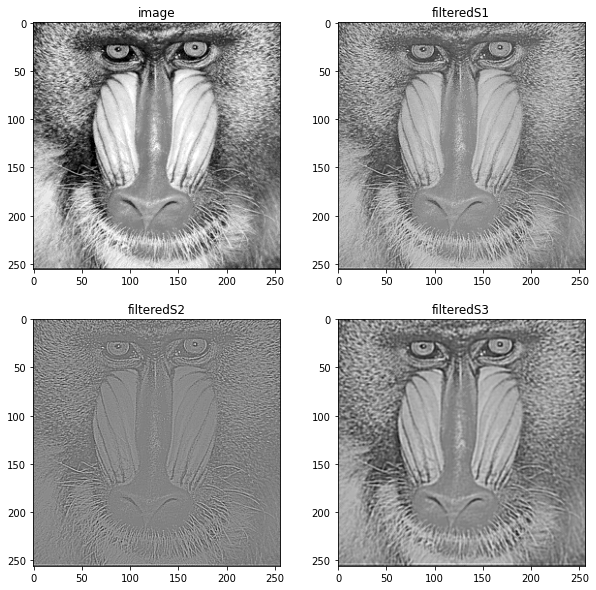

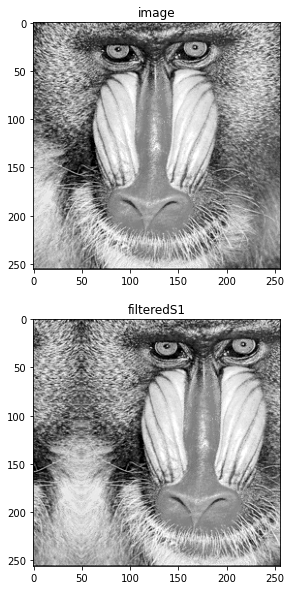

In [8]:

def shift_to_left(image, n):
    """Shift all pixel of the input image n column to the left."""
    result = image.copy()

    n = 2 * n + 1

    H = np.zeros((n, n))
    H[n // 2, n - 1] = 1.0

    result = convolve(result, H)

    return result

######################
# create filters here
######################

# filteredS1 = convolve(gray.copy(), filterS1)
# filteredS2 = convolve(gray.copy(), filterS2)
# filteredS3 = convolve(gray.copy(), filterS3)

# show_images(image=gray, filteredS1=filteredS1, filteredS2=filteredS2, filteredS3=filteredS3)

# filteredS4 = shift_to_left(gray.copy(), 50)

# show_images(image=gray, filteredS1=filteredS4)


Use the sharpen filters $K_1$, $K_2$ and $K_3$ to answer the following
exercises.

3.  **Sharpen an image:** Use the filter kernels $K_1$, $K_2$ and $K_3$
    in `scipy.ndimage.convolve` to sharpen an input image with each of the kernels $K_i$. Show
    the three filtered images and compare them with the original input
    image.
